In [1]:
%matplotlib inline
import time
start_time = time.time()
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy import ndimage 
from scipy.stats import moment
import random
from sklearn.decomposition import PCA


In [2]:
def Momentos(canal, momentos, features, n):
    for l in range(momentos):
        features[ojos[n]].append(moment(canal.reshape(rows*cols), moment=l + 1))
        return(features)

def MomentosEspaciales(canal, momentos, features, n):
    win_mean = ndimage.uniform_filter(canal, (win_rows, win_cols))
    win_sqr_mean = ndimage.uniform_filter(canal**2, (win_rows, win_cols))
    win_var = win_sqr_mean - win_mean**2
    for l in range(momentos):
        features[ojos[n]].append(moment(canal.reshape(rows*cols), moment=l + 1))
    return(win_var, features)

def MomentosDerivadas(imagen, momentos, features, n):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(imagen_gris, 13)
    features = Momentos(laplacian, momentos, features, n)
    sobelx = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=31)
    features = Momentos(sobelx, momentos, features, n)
    sobely = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=31)
    features = Momentos(sobely, momentos, features, n)
    edges = cv2.Canny(imagen,10,50)
    features = Momentos(edges, momentos, features, n)
 
    
    #fig=plt.figure(figsize=(6, 12))
    #fig.add_subplot(1, 5, 1)
    #plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    #plt.imshow(laplacian)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 5, 2)
    #plt.imshow(sobelx)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 5, 3)
    #plt.imshow(sobely)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 5, 4)
    #plt.imshow(edges)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #fig.add_subplot(1, 5, 5)
    #plt.imshow(imagen)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.show()
    return(features)



def EigenFoo(canal, n_vals, features, n):
    r_s =sp.csc_matrix(canal).asfptype()
    vals = sp.linalg.eigs(r_s, k=n_vals, which='LM',return_eigenvectors=False , tol=tolerancia)
    vals = np.abs(vals)
    for l in vals:
        features[ojos[n]].append(l)
    vals = sp.linalg.eigs(r_s, k=n_vals, which='SM',return_eigenvectors=False , tol= tolerancia)
    vals = np.abs(vals)
    for l in vals:
        features[ojos[n]].append(l)
    return(features)

def MainRGB(ojos, n, features):
    print(i)
    ojo = cv2.imread(ojos[n])
     # filtros direccionales
    features = MomentosDerivadas(ojo, momentos, features, n)
    ## TRABAJO EN ESPACIO RGB
    # division en canales 
    b,g,r = cv2.split(ojo)       # get b,g,r
    # eliminacion de pixeles negros
    mask = r< 5
    r[mask] = 255 
    r = cv2.medianBlur(r, 5)
    #calculo de momentos
    #momentos del canal natural en r
    features = Momentos(r, momentos ,features, n)
    #features = EigenFoo(r, n_vals, features, n)
    #print('first eiegen')
    mask = g< 5
    g[mask] = 255 
    g = cv2.medianBlur(g,5)
    #momentos del canal natural en green
    features = Momentos(g, momentos, features, n)
    #features = EigenFoo(g, n_vals, features, n)
    #print('2 eiegen')
    mask = b< 5
    b[mask] = 255 
    b = cv2.medianBlur(b, 5)
    #momentos del canal natural en blue
    features = Momentos(b, momentos, features, n)
    #features = EigenFoo(b, n_vals, features, n)
    #print('3 eiegen')
        #momentos del canal despues del filtro de correlacion espacial
    var_r, features = MomentosEspaciales(r, momentos, features, n )
    var_g, features = MomentosEspaciales(g, momentos, features, n )
    var_b, features = MomentosEspaciales(b, momentos, features, n )
    #features = EigenFoo(var_r, n_vals, features, n)
    #print('4 eiegen')
    #features = EigenFoo(var_g, n_vals, features, n)
    #print('5 eiegen')
    #features = EigenFoo(var_b, n_vals, features, n)
    #print('6 eiegen')
    #fig=plt.figure(figsize=(6, 12))
    #fig.add_subplot(1, 4, 1)
    #plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    #plt.imshow(var_r)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 2)
    #plt.imshow(var_g)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 3)
    #plt.imshow(var_b)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #ojo = cv2.merge([r,g,b])
    #fig.add_subplot(1, 4, 4)
    #plt.imshow(ojo)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.show()
    return(features)

def MainHSV(ojos, n, features):
    print(i)
    ojo = cv2.imread(ojos[n])
    hsv = cv2.cvtColor(ojo, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)

     # filtros direccionales
    features = MomentosDerivadas(hsv, momentos, features, n)
    ## TRABAJO EN ESPACIO HSV
    # division en canales 
    #calculo de momentos
    #momentos del canal natural en r
    features = Momentos(h, momentos ,features, n)
    features = Momentos(s, momentos, features, n)
    features = Momentos(v, momentos, features, n)
    var_r, features = MomentosEspaciales(h, momentos, features, n )
    var_g, features = MomentosEspaciales(s, momentos, features, n )
    var_b, features = MomentosEspaciales(v, momentos, features, n )
    #fig=plt.figure(figsize=(6, 12))
    #fig.add_subplot(1, 4, 1)
    #plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    #plt.imshow(var_r)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 2)
    #plt.imshow(var_g)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 3)
    #plt.imshow(var_b)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #ojo = cv2.merge([r,g,b])
    #fig.add_subplot(1, 4, 4)
    #plt.imshow(ojo)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.show()
    return(features)

def MainPCA(ojos, n, features):
    print(n)
    ojo = cv2.imread(ojos[n])
    b,g,r = cv2.split(ojo)
    r_v = r.reshape((1378**2,1))
    g_v = g.reshape((1378**2,1))
    b_v = b.reshape((1378**2,1))
    data = np.hstack([r_v, g_v, b_v])
    pca = PCA(n_components=3, ).fit((data))
    for i in pca.explained_variance_:
        features[ojos[n]].append(i)
    numeros = pca.transform(data)
    rota = (numeros - np.min(numeros))/(np.max(numeros)-np.min(numeros))
    rota = np.round(rota)*255
    r_v = rota[:, 0].reshape((1378, 1378))
    g_v = rota[:, 1].reshape((1378, 1378))
    b_v = rota[:, 2].reshape((1378, 1378))
    #fig=plt.figure(figsize=(6, 12))
    #fig.add_subplot(1, 4, 1)
    #plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    #plt.imshow(r_v, cmap='gray')
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 2)
    #plt.imshow(g_v, cmap='gray')
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 3)
    #plt.imshow(b_v, cmap='gray')
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #ojo = cv2.merge([r,g,b])
    #fig.add_subplot(1, 4, 4)
    #plt.imshow(ojo)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.show()
     # filtros direccionales
    features = MomentosDerivadas(ojo, momentos, features, n)
    ## TRABAJO EN ESPACIO PCA
    features = Momentos(r_v, momentos ,features, n)
    features = Momentos(g_v, momentos, features, n)
    features = Momentos(b_v, momentos, features, n)
    var_r, features = MomentosEspaciales(r_v, momentos, features, n )
    var_g, features = MomentosEspaciales(g_v, momentos, features, n )
    var_b, features = MomentosEspaciales(b_v, momentos, features, n )
    #fig=plt.figure(figsize=(6, 12))
    #fig.add_subplot(1, 4, 1)
    #plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    #plt.imshow(var_r)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 2)
    #plt.imshow(var_g)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #fig.add_subplot(1, 4, 3)
    #plt.imshow(var_b)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.xlabel('')
    #ojo = cv2.merge([r,g,b])
    #fig.add_subplot(1, 4, 4)
    #plt.imshow(ojo)
    #plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    #plt.show()
    return(features)


In [3]:
np.random.seed(0)
#experimento = 50
#index = random.sample(list(range(1200)), experimento)
#index = list(map(lambda x: int(x), index))
#index = np.array(index)
#from scipy import sparse as sp
# parametros
#n_vals = 10
#tolerancia = 10

momentos = 25 #numero de momentos estimados
win_rows, win_cols = 3, 3 #tamanio de la ventana
os.chdir('C:\\Users\\Daniel\\Desktop\\CD2EDUARDOFOO\\Retina\\DataETL\\')
y = pd.read_csv('C:\\Users\\Daniel\\Desktop\\CD2EDUARDOFOO\\Retina\\Code\\metadata.csv')
y = y['y']
y = list(map(lambda x: int(x), y))
y = np.array(y)
#y= y[index]
ojos = os.listdir()
#ojos = [ojos[i] for i in index ]
rows, cols = 1378, 1378       #dimension de la imagen
features = dict()
for i in ojos:
    features[str(i)] = list()
n = 0


In [4]:
for i in range(len(ojos)):
    features = MainRGB(ojos, i, features)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
for i in range(len(ojos)):
    features = MainHSV(ojos, i, features)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
for i in range(len(ojos)):
    features = MainPCA(ojos, i, features)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
#data = pd.read_csv('C:\\Users\\fou-f\\Desktop\\CD2EDUARDOFOO\\Retina\\Resultados\\emALLw81m11All.csv')
#data.describe()

In [10]:
dataFrame = pd.DataFrame.from_dict(features, orient='index')
#dataFrame = data

In [11]:
from sklearn.model_selection import train_test_split
dataFrame.shape[1]

249

In [12]:
columnas= []
for i in range(dataFrame.shape[1]):
    columnas.append('X'+str((i+1)))

In [13]:
dataFrame.columns = columnas
dataFrame.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249
count,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.000000,1200.000000,...,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1946.955656,56237.924185,...,1.459189e+36,3.502752e+38,8.430085e+40,2.033667e+43,4.916693e+45,1.191079e+48,2.890826e+50,7.028510e+52,1.711660e+55,4.174865e+57
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,976.840145,104788.498554,...,2.336767e+36,5.596411e+38,1.344013e+41,3.236029e+43,7.810200e+45,1.889245e+48,4.579657e+50,1.112357e+53,2.706910e+55,6.599005e+57
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.977557,-157647.808329,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1157.577494,-18264.633630,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1822.722226,34591.524626,...,5.664780e+34,1.358920e+37,3.410265e+39,8.015039e+41,1.983390e+44,4.768263e+46,1.051914e+49,2.350557e+51,5.619079e+53,1.229032e+56
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2504.825656,113503.391849,...,1.946533e+36,4.726762e+38,1.179260e+41,2.836121e+43,6.912274e+45,1.706656e+48,4.210072e+50,1.022934e+53,2.525873e+55,6.214093e+57
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5349.260037,479245.171430,...,7.126278e+36,1.713599e+39,4.133416e+41,9.999139e+43,2.425484e+46,5.897204e+48,1.436953e+51,3.508283e+53,8.580108e+55,2.102314e+58


In [14]:
y1 = list(map(lambda x: str(x), y))
y = y1
from sklearn.preprocessing import scale
data_escalado = pd.DataFrame( scale(dataFrame))

C:\Users\Daniel\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [15]:
train, test, y_train, y_test = train_test_split(data_escalado, y, test_size=0.3, random_state=0) # es importante este detalle para que todos tengamos el mismo resultado
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
count,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105761,0.119050,...,-0.117932,-0.123044,-0.127789,-0.132176,-0.136220,-0.139933,-0.143326,-0.146411,-0.149201,-0.151708
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.072589,1.057610,...,0.912073,0.904236,0.896953,0.890225,0.884047,0.878413,0.873308,0.868718,0.864625,0.861007
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.642506,-2.041969,...,-0.624708,-0.626154,-0.627494,-0.628707,-0.629785,-0.630715,-0.631495,-0.632121,-0.632593,-0.632914
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.731609,-0.668666,...,-0.624708,-0.626154,-0.627494,-0.628707,-0.629785,-0.630715,-0.631495,-0.632121,-0.632593,-0.632914
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.014492,-0.108266,...,-0.615530,-0.616382,-0.617119,-0.617720,-0.621890,-0.623178,-0.624771,-0.625122,-0.625394,-0.627049
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693397,0.702191,...,-0.126741,-0.137611,-0.138029,-0.119897,-0.125215,-0.106060,-0.106384,-0.121529,-0.115867,-0.109854
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.484422,3.886191,...,2.422117,2.437068,2.449218,2.462522,2.476168,2.491443,2.506510,2.523113,2.535939,2.552226


# Intento de clasificación 

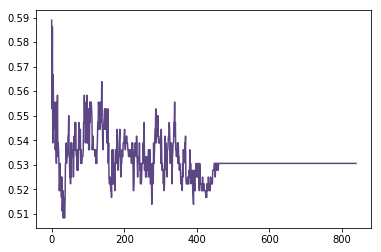

In [16]:
from sklearn.neighbors import KNeighborsClassifier
errores_knn_class = []
for i in range(round(len(train))):
    knn = KNeighborsClassifier(n_neighbors= (i+1))
    knn.fit(train,   y_train) 
    predictions = knn.predict(test)
    prediccionesCorrectas = [predictions == y_test ] 
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)
    errores_knn_class.append(accuracy)
plt.plot(errores_knn_class, c='#5C4684') #el color pantone 2018
errores_knn_class = np.array(errores_knn_class)

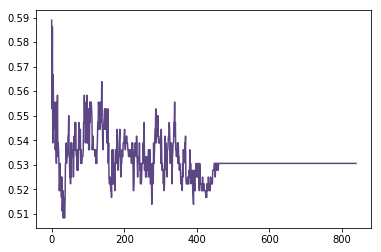

In [17]:
cotaSuperior = 15
errores_knn_class < cotaSuperior
plt.plot(errores_knn_class[errores_knn_class < cotaSuperior] , c='#5C4684') #el color pantone 2018

Dice Uresti que los chidos iban a ser los RF.

In [18]:
from sklearn.ensemble import RandomForestClassifier
acc_RF = []
ite = np.array(list(range(len(train))))
for i in ite:
    if(i % 15== 0):
        trees = i + 1 
        rf = RandomForestClassifier(n_estimators=trees) # inicializamos el clasificador
        rf.fit(train, y_train) #otra linea que nos libra de cuentas
        predictions = rf.predict(test) # otra linea que se agradece
        prediccionesCorrectas=[predictions==y_test] #de nuevo el error consiste en solo contar :D
        accuracy= np.sum(prediccionesCorrectas) / len(predictions)
        acc_RF.append(accuracy)
        print('Presición con Random forest: ' + str(accuracy) + ' con ' + str(trees) +' árboles')


C:\Users\Daniel\Anaconda3\envs\keras\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Presición con Random forest: 0.5305555555555556 con 1 árboles
Presición con Random forest: 0.5833333333333334 con 16 árboles
Presición con Random forest: 0.5444444444444444 con 31 árboles
Presición con Random forest: 0.5944444444444444 con 46 árboles
Presición con Random forest: 0.575 con 61 árboles
Presición con Random forest: 0.6138888888888889 con 76 árboles
Presición con Random forest: 0.5833333333333334 con 91 árboles
Presición con Random forest: 0.6111111111111112 con 106 árboles
Presición con Random forest: 0.5777777777777777 con 121 árboles
Presición con Random forest: 0.5666666666666667 con 136 árboles
Presición con Random forest: 0.6083333333333333 con 151 árboles
Presición con Random forest: 0.5805555555555556 con 166 árboles
Presición con Random forest: 0.6 con 181 árboles
Presición con Random forest: 0.6027777777777777 con 196 árboles
Presición con Random forest: 0.5944444444444444 con 211 árboles
Presición con Random forest: 0.5888888888888889 con 226 árboles
Presición co

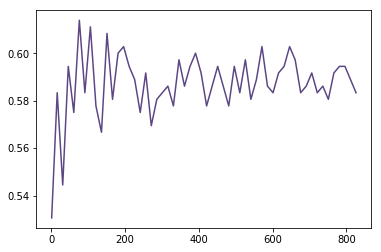

In [19]:
plt.plot((ite[range(len(acc_RF))])*15+1 , acc_RF, c='#5C4684') #el color pantone 2018
acc_RF = np.array(acc_RF)

In [20]:
print("--- %s seconds ---" % (time.time() - start_time))


--- 13607.310710906982 seconds ---


In [ ]:
#data_escalado.to_csv('C:\\Users\\fou-f\\Desktop\\CD2EDUARDOFOO\\Retina\\Resultados\\emALLw81m25All.csv')

In [22]:
data_escalado.to_csv('C:\\Users\\Daniel\\Desktop\\CD2EDUARDOFOO\\Retina\\Resultados\\emALLw3m25All.csv')